In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# import housing_price sheet
house_prices = pd.read_csv("../Ames_HousePrice.csv")

In [5]:
house_prices.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [6]:
house_prices[house_prices.columns.isnull().any()]

KeyError: False

In [7]:
house_prices[house_prices.columns[house_prices.isnull().any()]].isnull().sum()

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [10]:
house_prices.shape

(2580, 82)

In [12]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20     171
60     128
120     33
80      30
50      24
90      17
85      15
160     13
30      12
70      10
190      4
75       2
40       1
180      1
150      1
Name: MSSubClass, dtype: int64

In [8]:
house_prices[house_prices['YearRemodAdd'] == house_prices['YearBuilt']]
# houses that have not been remodeled

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
2570,754,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2571,755,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [9]:
house_prices['YearRemodAdd'] - house_prices['YearBuilt']
# can create a column showing how many years between building and remodel

0        11
1         0
2        77
3       103
4         0
       ... 
2575     34
2576      0
2577      1
2578      0
2579      1
Length: 2580, dtype: int64

In [10]:
house_prices['YrSold'] - house_prices['YearRemodAdd']
# column showing years between last remodel and the year that it was sold (how new the construction is)

0       60
1       25
2        0
3        6
4        8
        ..
2575    59
2576    54
2577    57
2578     7
2579    12
Length: 2580, dtype: int64

In [11]:
house_prices['BsmtExposure'].value_counts()

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64

In [12]:
imputation_dict = house_prices.groupby(['MSSubClass', 'Neighborhood'])[['LotFrontage']].mean().to_dict()
# groupby subclass, neighborhood, interpolate average lot frontage

In [13]:
missingRowIndexes = house_prices.LotFrontage.isnull()
# impute the value by using the above imputation_dict
house_prices.loc[missingRowIndexes,'LotFrontage'] = house_prices[missingRowIndexes].apply(\
    lambda row: imputation_dict['LotFrontage'][(row['MSSubClass'], row['Neighborhood'])], axis = 1)

In [14]:
house_prices[house_prices['LotFrontage'].isnull()]["Neighborhood"]

109     GrnHill
275     Veenker
369     Mitchel
471      NWAmes
653     ClearCr
683     GrnHill
1068    ClearCr
1204    Landmrk
1401     NWAmes
1482    BrkSide
1485    Veenker
1634     Timber
1641     NWAmes
1920     NWAmes
1943     NWAmes
1960    ClearCr
2116    BrkSide
2222     NWAmes
2294    ClearCr
2327    Veenker
2361    ClearCr
Name: Neighborhood, dtype: object

In [15]:
house_prices['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [16]:
house_prices["MSSubClass"].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

In [17]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

85     4
120    3
60     3
190    3
50     2
75     2
70     1
160    1
40     1
150    1
Name: MSSubClass, dtype: int64

FireplaceQu    48.100775
Fence          79.651163
Alley          93.488372
MiscFeature    96.240310
PoolQC         99.651163
dtype: float64


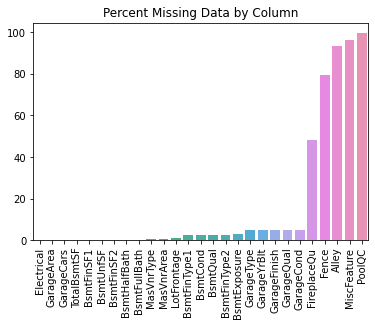

In [13]:
def percent_null(housing):
    percentmis = 100* housing.isnull().sum() / len(housing)
    return percentmis
percentmis=percent_null(house_prices)


percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(percentmis[percentmis>=20])

In [18]:
house_prices[(house_prices["MSSubClass"] == 85) & (house_prices["Neighborhood"] == "NWAmes")]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1401,402,527358090,1083,172000,85,RL,NaN,9927,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1641,642,527328010,1102,169000,85,RL,NaN,10464,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1920,104,534127140,1082,162500,85,RL,NaN,8723,Pave,NaN,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1943,127,534251030,1320,172500,85,RL,NaN,16500,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [19]:
house_prices.dtypes

Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object

In [20]:
house_prices = house_prices[house_prices['LotFrontage'].isnull() == False]
# remove null lot frontage where couldn't interpolate(21 rows)

In [21]:
house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)
house_prices.head()
# boolean if house has been remodeled or not

/var/folders/5g/qrh9fj2s5bb2ppv5y8j3wbxm0000gn/T/ipykernel_11968/499082495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
/var/folders/5g/qrh9fj2s5bb2ppv5y8j3wbxm0000gn/T/ipykernel_11968/499082495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)


,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled
0,1,909176150,856,126000,30,RL,57.8,7890,Pave,NaN,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,0


In [22]:
house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF
house_prices['BsmtfinSF']

/var/folders/5g/qrh9fj2s5bb2ppv5y8j3wbxm0000gn/T/ipykernel_11968/1290992087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF


0       238.0
1       945.0
2       737.0
3         0.0
4       643.0
        ...  
2575      0.0
2576      0.0
2577    284.0
2578    841.0
2579    380.0
Name: BsmtfinSF, Length: 2559, dtype: float64

In [23]:
house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0

/var/folders/5g/qrh9fj2s5bb2ppv5y8j3wbxm0000gn/T/ipykernel_11968/2358082801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0


In [24]:
house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)

/var/folders/5g/qrh9fj2s5bb2ppv5y8j3wbxm0000gn/T/ipykernel_11968/1395337164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)


In [25]:
house_prices['Fireplaces'].value_counts()
# changed fireplaces to present/not

1    1324
0    1235
Name: Fireplaces, dtype: int64

In [26]:
house_prices.shape

(2559, 84)

In [27]:
# columns to drop
drop_list = ['MiscVal', 'PoolArea', 'LowQualFinSF', 'Heating', 'RoofMatl', 'GarageYrBlt', 'FireplaceQu', 'TotalBsmtSF', 'Utilities', 'PoolQC', 'Alley', 'MiscFeature', 'GarageFinish', 'GarageArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2']

In [28]:
# dropping columns
house_prices = house_prices.drop(drop_list, axis=1)
house_prices.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Remodeled', 'BsmtfinSF'],
      dtype='

In [29]:
house_prices["Fence"] = (house_prices["Fence"].isnull() == False).astype(int)
# convert fence into boolean 1/0

In [30]:
house_prices.loc[house_prices["Fence"] == True]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
11,12,923426070,1274,136000,60,RL,63.0,10475,Pave,Reg,...,0,0,0,1,3,2010,WD,Normal,0,458.0
42,43,535425060,1312,186000,20,RL,76.0,11355,Pave,IR1,...,144,0,0,1,4,2008,WD,Normal,1,637.0
48,49,902106130,936,109500,30,RM,56.0,4485,Pave,Reg,...,135,0,0,1,5,2010,WD,Normal,1,579.0
49,50,902102080,1230,110000,50,RM,60.0,10440,Pave,Reg,...,128,0,0,1,5,2009,WD,Normal,1,0.0
55,56,532479020,1641,140000,50,RL,70.0,10759,Pave,Reg,...,92,0,0,1,7,2008,WD,Normal,0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,743,535179020,1580,159500,20,RL,80.0,10032,Pave,Reg,...,0,0,160,1,6,2010,WD,Normal,0,734.0
2564,748,535402220,1734,159000,50,RL,77.0,9786,Pave,IR1,...,0,0,128,1,6,2006,WD,Normal,1,600.0
2567,751,910200110,1215,141000,50,RM,50.0,7000,Pave,Reg,...,30,0,0,1,5,2007,WD,Normal,1,375.0
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,Reg,...,0,0,0,1,6,2008,WD,Normal,0,531.0


In [31]:
categorical = list(house_prices.columns)
for feature in categorical:
    print(house_prices[feature].value_counts())
    print('')

1      3
514    3
504    3
2      3
506    3
      ..
881    1
882    1
883    1
884    1
896    1
Name: Unnamed: 0, Length: 1000, dtype: int64

909276070    2
909176150    1
902206040    1
535457070    1
909250220    1
            ..
532479120    1
531452260    1
528488130    1
923229010    1
906223180    1
Name: PID, Length: 2558, dtype: int64

864     38
1040    25
1092    24
1456    15
1200    14
        ..
778      1
2501     1
1477     1
1837     1
1911     1
Name: GrLivArea, Length: 1202, dtype: int64

135000    32
140000    28
155000    27
130000    27
145000    23
          ..
254750     1
40000      1
67000      1
418000     1
139600     1
Name: SalePrice, Length: 866, dtype: int64

20     939
60     499
50     257
120    166
30     123
160    119
70     115
80     109
90      87
190     50
85      39
75      19
45      17
180     15
40       5
Name: MSSubClass, dtype: int64

RL         1990
RM          416
FV          113
RH           20
C (all)      17
I (all)       2
A (ag

In [25]:
house_prices.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
0,1,909176150,856,126000,30,RL,57.8,7890,Pave,Reg,...,0,0,166,0,3,2010,WD,Normal,1,238.0
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,...,0,0,0,0,2,2009,WD,Normal,0,945.0
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,...,42,86,0,0,11,2007,WD,Normal,1,737.0
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,...,168,0,111,0,5,2009,WD,Normal,1,0.0
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,Reg,...,0,0,0,0,11,2009,WD,Normal,0,643.0


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

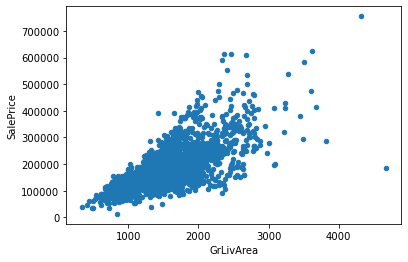

In [26]:
house_prices[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

From the ML proposal notebook: the fanning shows that there's variation on price/sqft (one of the common metrics for pricing a house/apartment), so we have an issue with constant variance.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

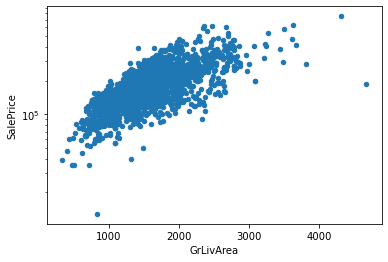

In [43]:
house_prices[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logy=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

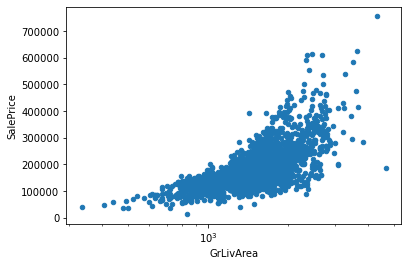

In [44]:
house_prices[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

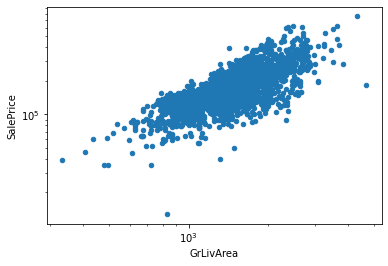

In [46]:
house_prices[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

In [27]:
lm = LinearRegression()
price = house_prices[["SalePrice"]]
grLivArea = house_prices[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.521816110210088

In [28]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

0.542149924450527

do we want to use a log-log linear model? the way they did?

$$log(price) = \beta_0 +\beta_1\cdot log(area) + \epsilon$$

$$price = 10^{\beta_0} \cdot area^{\beta_1}\cdot 10^{\epsilon}$$



In [29]:
lm.intercept_, lm.coef_

(array([2.43256977]), array([[0.88415717]]))

$${price\over area} = 10^{2.44}\cdot area^{-0.12}\cdot 10^{\epsilon}$$


based on what we saw in the ml proposal notebook, larger and smaller homes have different price/sqft

In [30]:
house_prices.groupby(['MoSold']).mean(["SalePrice"])

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,YrSold,Remodeled,BsmtfinSF
MoSold,,,,,,,,,,,,,,,,,,,,,
1,458.610000,7.279948e+08,1543.320000,194169.790000,54.450000,71.165246,11682.300000,6.210000,5.190000,1973.630000,...,1.700000,99.960000,58.870000,16.450000,1.960000,13.430000,0.190000,2008.010000,0.450000,548.370000
2,393.655462,7.305663e+08,1465.084034,175819.806723,58.277311,68.316347,9145.042017,6.134454,5.563025,1972.579832,...,1.705882,92.361345,42.067227,18.806723,4.621849,14.722689,0.277311,2008.117647,0.436975,493.218487
3,445.201923,7.213118e+08,1449.846154,174975.274038,55.264423,69.143459,9525.600962,6.000000,5.543269,1970.346154,...,1.700483,86.475962,43.000000,19.947115,0.000000,10.524038,0.206731,2008.043269,0.480769,493.716346
4,447.204819,7.269872e+08,1412.943775,166568.855422,59.658635,66.434485,9444.425703,5.971888,5.662651,1970.160643,...,1.662651,92.293173,37.738956,31.309237,1.024096,14.188755,0.200803,2008.196787,0.417671,500.137097
5,414.282548,7.411355e+08,1455.387812,172716.382271,61.108033,67.627528,9428.282548,5.939058,5.689751,1968.734072,...,1.731302,103.321330,45.667590,26.836565,2.883657,14.811634,0.202216,2007.966759,0.473684,498.783934
6,457.375824,7.142490e+08,1501.305495,181087.217582,54.879121,71.945332,11181.527473,6.026374,5.665934,1969.870330,...,1.804396,90.437363,51.059341,23.147253,2.606593,21.865934,0.197802,2007.947253,0.461538,488.459341
7,416.460957,7.066457e+08,1490.372796,180099.491184,57.594458,68.876560,9789.153652,6.002519,5.768262,1969.813602,...,1.727960,95.974811,44.869018,21.037783,1.327456,15.125945,0.226700,2007.564232,0.463476,474.093199
8,443.203125,6.740316e+08,1508.208333,183015.895833,54.947917,66.663308,9705.093750,6.130208,5.541667,1972.453125,...,1.765625,93.838542,38.781250,23.390625,2.604167,14.630208,0.156250,2007.614583,0.484375,487.380208
9,463.046154,7.136826e+08,1514.215385,182699.946154,54.076923,69.728191,10265.415385,6.223077,5.661538,1970.569231,...,1.738462,107.484615,45.223077,26.184615,3.038462,14.107692,0.161538,2007.638462,0.469231,479.615385


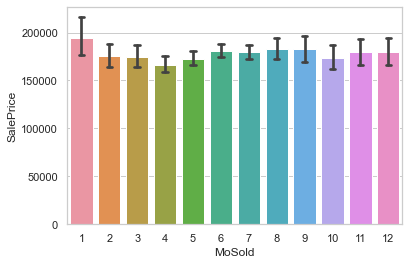

In [31]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="MoSold", y="SalePrice", data=house_prices, capsize=.2)

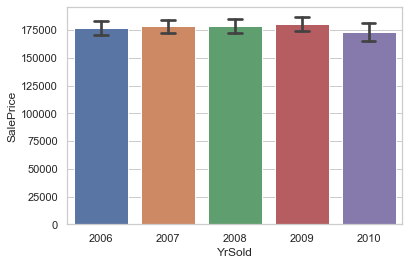

In [32]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="YrSold", y="SalePrice", data=house_prices, capsize=.2)

In [65]:
house_prices.groupby(['YrSold', 'MoSold']).mean(["SalePrice"])

Unnamed: 0           PID    GrLivArea      SalePrice  \
YrSold MoSold                                                         
2006   1       592.666667  6.562435e+08  1514.933333  193051.666667   
       2       396.000000  7.184607e+08  1606.750000  185958.250000   
       3       457.650000  6.830155e+08  1409.225000  176295.300000   
       4       439.902439  7.524594e+08  1460.170732  164854.731707   
       5       424.492537  7.347922e+08  1436.985075  167335.522388   
       6       405.620690  7.040517e+08  1467.494253  172722.873563   
       7       444.350515  7.097814e+08  1464.463918  173276.690722   
       8       519.242424  7.125049e+08  1561.000000  193533.636364   
       9       532.275862  7.002092e+08  1637.586207  207747.862069   
       10      487.487179  7.436403e+08  1426.128205  153223.871795   
       11      405.652174  6.640692e+08  1592.173913  192623.913043   
       12      375.000000  6.897706e+08  1663.842105  198750.526316   
2007   1       357.259259  7.553607e+08  1616.888889  206317.666667   
       2       425.478261  7.269890e+08  1470.869565  158067.956522   
       3       490.934783  7.019876e+08  1489.152174  175056.108696   
       4       443.595238  7.114601e+08  1406.333333  161389.047619   
       5       395.571429  7.597270e+08  1452.738095  172200.226190   
       6       467.395833  7.127748e+08  1489.677083  182641.114583   
       7       371.723404  7.157585e+08  1442.223404  174406.021277   
       8       438.322581  6.642277e+08  1523.354839  187132.241935   
       9       411.517241  7.399140e+08  1451.931034  163431.206897   
       10      423.111111  6.768730e+08  1556.750000  201356.222222   
       11      414.193548  6.889889e+08  1580.354839  179679.806452   
       12      465.480000  7.136361e+08  1388.960000  183294.000000   
2008   1       494.333333  8.230049e+08  1515.428571  184847.666667   
       2       427.800000  7.880885e+08  1436.440000  193429.440000   
       3       400.878788  7.591113e+08  1433.333333  164235.818182   
       4       438.789474  7.558968e+08  1344.298246  160029.789474   
       5       457.421053  7.339083e+08  1442.355263  172453.026316   
       6       473.350000  7.382251e+08  1531.770000  186212.780000   
       7       426.353535  7.102885e+08  1510.313131  180531.212121   
       8       409.534884  6.706667e+08  1487.860465  189663.953488   
       9       398.562500  7.314237e+08  1584.812500  181051.562500   
       10      425.769231  6.189478e+08  1466.615385  163900.000000   
       11      539.346154  6.763460e+08  1522.192308  181549.115385   
       12      419.681818  7.189594e+08  1644.727273  181852.272727   
2009   1       428.187500  7.655856e+08  1430.562500  188005.812500   
       2       384.120000  7.264610e+08  1410.880000  171429.720000   
       3       452.604651  7.237964e+08  1382.651163  177780.813953   
       4       420.933333  6.993873e+08  1494.688889  184601.111111   
       5       377.177419  7.011779e+08  1488.790323  174854.500000   
       6       494.153061  7.040104e+08  1550.857143  188315.336735   
       7       409.232323  6.903453e+08  1551.848485  194726.292929   
       8       429.148148  6.644560e+08  1474.759259  166568.388889   
       9       501.800000  6.902401e+08  1413.450000  179828.750000   
       10      427.319149  7.224971e+08  1502.063830  175755.319149   
       11      427.742857  7.254068e+08  1472.085714  169511.428571   
       12      447.842105  6.696876e+08  1529.473684  154699.105263   
2010   1       480.619048  6.204103e+08  1582.809524  193368.238095   
       2       340.038462  6.916805e+08  1430.653846  171013.461538   
       3       413.521739  7.444978e+08  1520.521739  178828.413043   
       4       480.218750  7.145172e+08  1390.687500  164211.140625   
       5       413.027778  7.673851e+08  1460.597222  176762.583333   
       6       434.932432  7.093091e+08  1449.351351  172406.297297   
       7       571.000000  7.181901e+08

month/year of sale doesn't seem to affect price

Text(0, 0.5, 'Count')

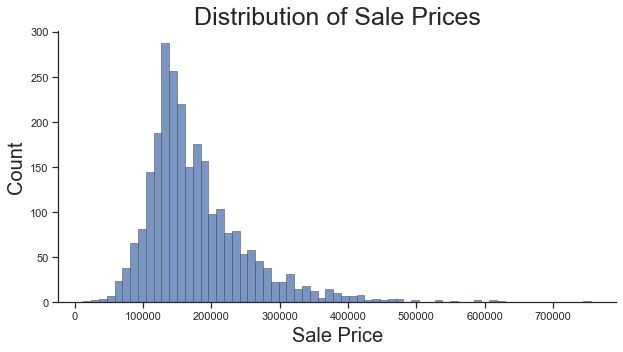

In [32]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    house_prices,
    x="SalePrice",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

ax.set_title("Distribution of Sale Prices", size="25")
ax.set_xlabel("Sale Price", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)



NameError: name 'mpl' is not defined

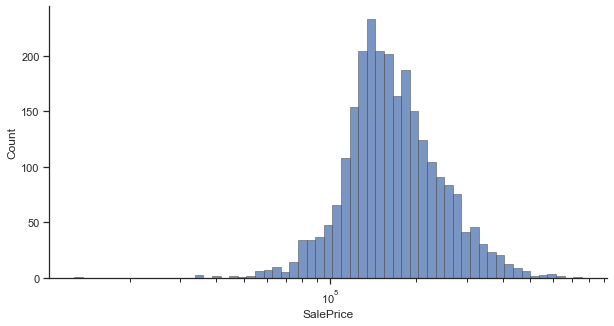

In [33]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    house_prices,
    x="SalePrice",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([100000, 200000, 300000])

In [37]:
grouped_house_prices = house_prices.groupby(["Neighborhood"])["SalePrice"].median().sort_values(ascending=False)
grouped_house_prices

Neighborhood
NoRidge    302000.0
NridgHt    300000.0
StoneBr    278000.0
Veenker    250250.0
Somerst    223000.0
Timber     220000.0
ClearCr    211000.0
CollgCr    199450.0
Crawfor    198000.0
Greens     198000.0
Blmngtn    191000.0
NWAmes     184500.0
SawyerW    184000.0
Gilbert    183500.0
Mitchel    153500.0
NPkVill    143875.0
NAmes      141000.0
SWISU      136200.0
Sawyer     136000.0
Blueste    130500.0
BrkSide    127000.0
Edwards    125200.0
OldTown    122000.0
IDOTRR     112500.0
BrDale     106000.0
MeadowV     89375.0
Name: SalePrice, dtype: float64

In [74]:
grouped_house_prices.index

Index(['MeadowV', 'BrDale', 'IDOTRR', 'BrkSide', 'OldTown', 'Edwards', 'SWISU',
       'Sawyer', 'NPkVill', 'Blueste', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Greens', 'Blmngtn', 'CollgCr', 'Crawfor',
       'ClearCr', 'Somerst', 'Timber', 'Veenker', 'StoneBr', 'NridgHt',
       'NoRidge'],
      dtype='object', name='Neighborhood')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'NoRidge'),
  Text(1, 0, 'NridgHt'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'Veenker'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'Timber'),
  Text(6, 0, 'ClearCr'),
  Text(7, 0, 'CollgCr'),
  Text(8, 0, 'Crawfor'),
  Text(9, 0, 'Greens'),
  Text(10, 0, 'Blmngtn'),
  Text(11, 0, 'NWAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'Gilbert'),
  Text(14, 0, 'Mitchel'),
  Text(15, 0, 'NPkVill'),
  Text(16, 0, 'NAmes'),
  Text(17, 0, 'SWISU'),
  Text(18, 0, 'Sawyer'),
  Text(19, 0, 'Blueste'),
  Text(20, 0, 'BrkSide'),
  Text(21, 0, 'Edwards'),
  Text(22, 0, 'OldTown'),
  Text(23, 0, 'IDOTRR'),
  Text(24, 0, 'BrDale'),
  Text(25, 0, 'MeadowV')])

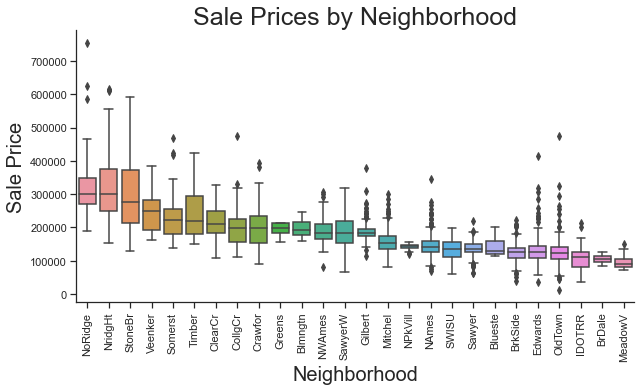

In [38]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=house_prices, order=grouped_house_prices.index)

ax.set_title("Sale Prices by Neighborhood", size="25")
ax.set_xlabel("Neighborhood", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'NoRidge'),
  Text(1, 0, 'NridgHt'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'Veenker'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'Timber'),
  Text(6, 0, 'ClearCr'),
  Text(7, 0, 'CollgCr'),
  Text(8, 0, 'Crawfor'),
  Text(9, 0, 'Greens'),
  Text(10, 0, 'Blmngtn'),
  Text(11, 0, 'NWAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'Gilbert'),
  Text(14, 0, 'Mitchel'),
  Text(15, 0, 'NPkVill'),
  Text(16, 0, 'NAmes'),
  Text(17, 0, 'SWISU'),
  Text(18, 0, 'Sawyer'),
  Text(19, 0, 'Blueste'),
  Text(20, 0, 'BrkSide'),
  Text(21, 0, 'Edwards'),
  Text(22, 0, 'OldTown'),
  Text(23, 0, 'IDOTRR'),
  Text(24, 0, 'BrDale'),
  Text(25, 0, 'MeadowV')])

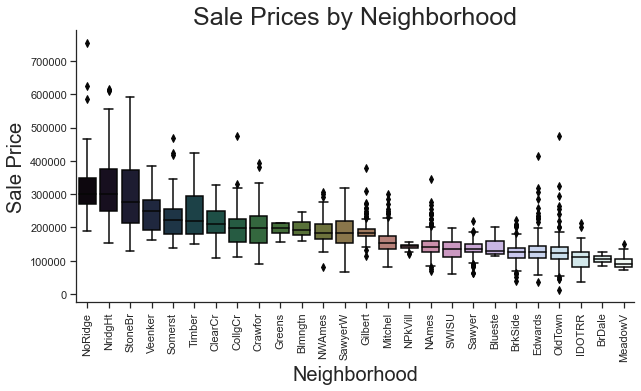

In [82]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.boxplot(
    data=house_prices,
    x="Neighborhood",
    y="SalePrice",
    palette="cubehelix",
    order=grouped_house_prices.index
)

ax.set_title("Sale Prices by Neighborhood", size="25")
ax.set_xlabel("Neighborhood", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
plt.xticks(rotation=90)

(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

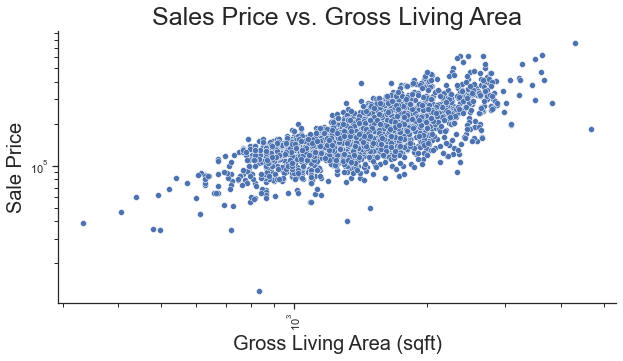

In [90]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.scatterplot(
    data=house_prices,
    x="GrLivArea",
    y="SalePrice"
)

ax.set(xscale="log", yscale="log")
ax.set_title("Sales Price vs. Gross Living Area", size="25")
ax.set_xlabel("Gross Living Area (sqft)", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
plt.xticks(rotation=90)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

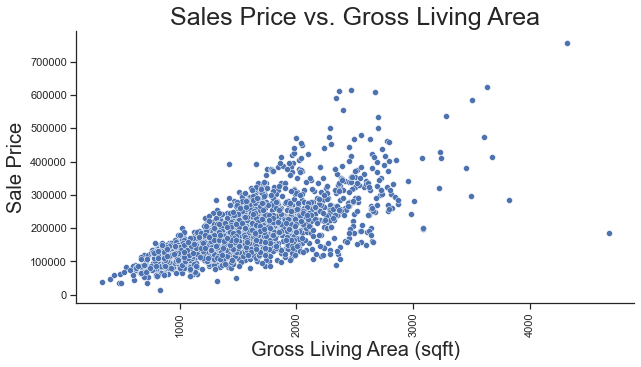

In [93]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.scatterplot(
    data=house_prices,
    x="GrLivArea",
    y="SalePrice"
)

# ax.set(xscale="log", yscale="log")
ax.set_title("Sales Price vs. Gross Living Area", size="25")
ax.set_xlabel("Gross Living Area (sqft)", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
plt.xticks(rotation=90)

Text(26.200000000000003, 0.5, 'Sale Price')

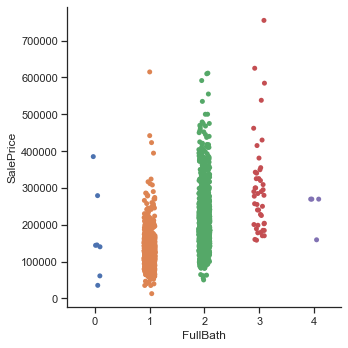

In [102]:
sns.catplot(
    x="FullBath", 
    y="SalePrice", 
    data=house_prices
)

ax.set_title("Sales Price vs. Number of Bathrooms", size="25")
ax.set_xlabel("Number of Full Bathrooms", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)

Text(26.200000000000003, 0.5, 'Sale Price')

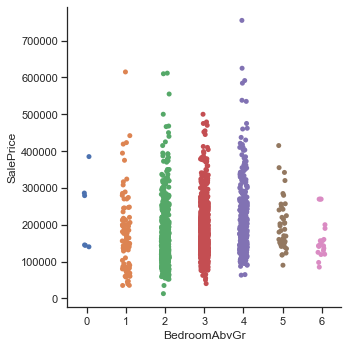

In [108]:


sns.catplot(
    x="BedroomAbvGr", 
    y="SalePrice", 
    data=house_prices
)

ax.set_title("Sales Price vs. Number of Bathrooms", size="25")
ax.set_xlabel("Number of Full Bathrooms", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)

In [39]:
neighborhood_house_counts = house_prices["Neighborhood"].value_counts()

In [40]:
neighborhood_house_counts

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NridgHt    121
NWAmes     117
SawyerW    113
Mitchel    103
BrkSide    101
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      53
StoneBr     43
SWISU       42
ClearCr     35
MeadowV     34
BrDale      29
Blmngtn     23
NPkVill     22
Veenker     20
Blueste     10
Greens       8
Name: Neighborhood, dtype: int64

In [42]:
neighborhood_house_counts_df = pd.DataFrame(neighborhood_house_counts)

In [43]:
neighborhood_house_counts_df = neighborhood_house_counts_df.reset_index()

Text(0, 0.5, 'Count')

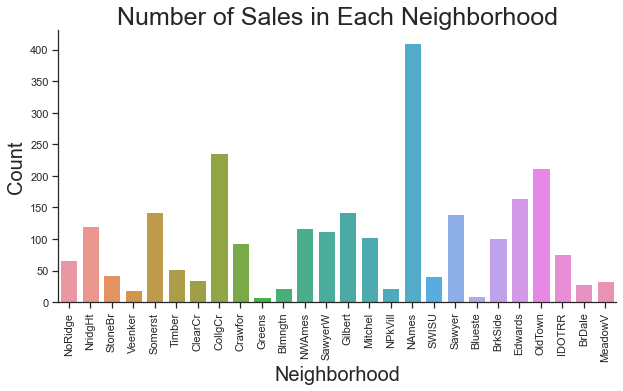

In [44]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

ax = sns.barplot(x="index", y="Neighborhood", data=neighborhood_house_counts_df, order = grouped_house_prices.index)
plt.xticks(rotation=90)
ax.set_title("Number of Sales in Each Neighborhood", size="25")
ax.set_xlabel("Neighborhood", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)